In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*تعداد داده های نول*

In [ ]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*تایپ داده ها*

In [ ]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

*احتمال زنده ماندن برای ستون های زیر*

In [ ]:
titanic_df.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [ ]:
titanic_df.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [ ]:
titanic_df.groupby('SibSp').Survived.mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [ ]:
titanic_df.groupby('Parch').Survived.mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

*تحلیل نمودار*

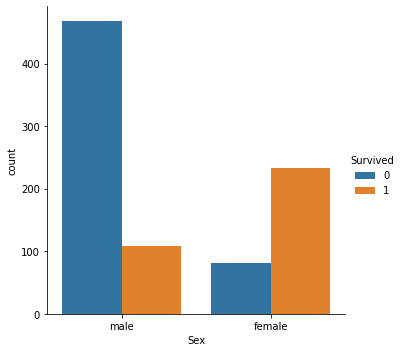

In [ ]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = titanic_df)

*تعداد کشته شدن مردها بیشتر از زن ها بود*

*رسم نمودار*

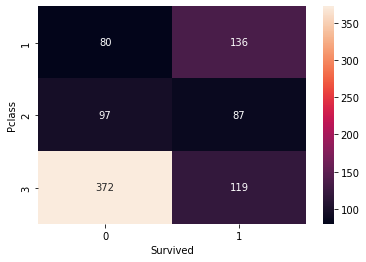

In [ ]:
group = titanic_df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
sns.heatmap(pclass_survived, annot = True, fmt ="d")

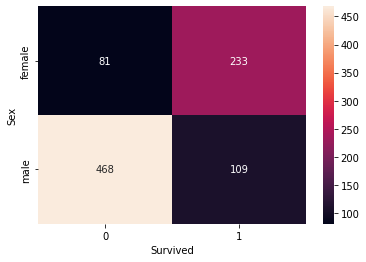

In [ ]:
group = titanic_df.groupby(['Sex', 'Survived'])
sex_survived = group.size().unstack()
 
sns.heatmap(sex_survived, annot = True, fmt ="d")

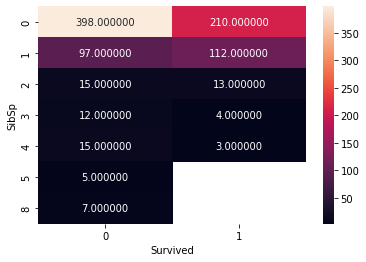

In [ ]:
group = titanic_df.groupby(['SibSp', 'Survived'])
sibsp_survived = group.size().unstack()
 
sns.heatmap(sibsp_survived, annot = True, fmt ="f")

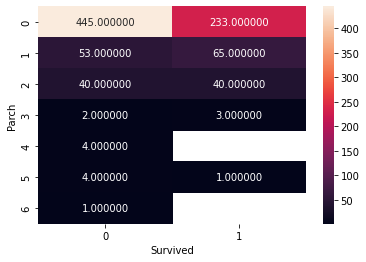

In [ ]:
group = titanic_df.groupby(['Parch', 'Survived'])
parch_survived = group.size().unstack()
 
sns.heatmap(parch_survived, annot = True, fmt ="f")

*barplot*

In [3]:
def bar_plot(column_name):
    """
        input: variable ex: "Survived"
        output: barplot & value count
    """
    # get feature
    feature = titanic_df.groupby([column_name]).agg({'Survived':'mean'})
    #feature_data = ?
    feature_data = feature.index
    # count number of data(value/sample)
    # feature_count= ?
    feature_count = feature['Survived']
    
    # visualize
    plt.figure(figsize = (9,3))
    # plt.bar(?)
    plt.bar(feature_data, feature_count)
    plt.xticks(feature_count.index, feature_count.index.values)
    plt.ylabel("Frequency")
    plt.title(column_name)
    plt.show()
    print(f"{column_name}: \n {feature_count}")

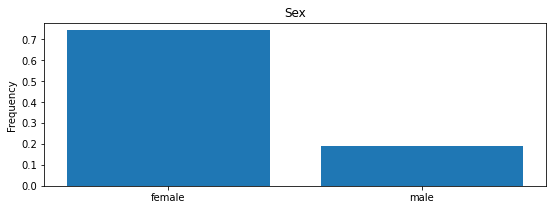

Sex: 
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


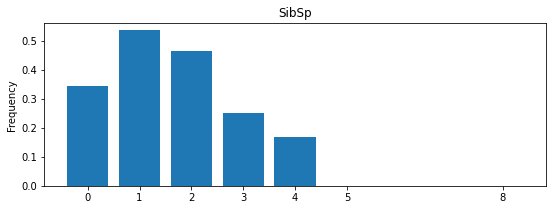

SibSp: 
 SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


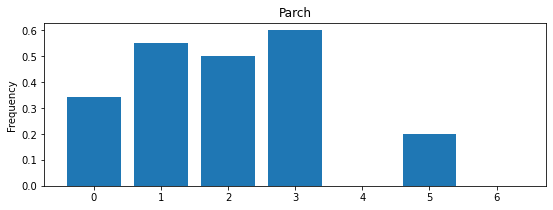

Parch: 
 Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


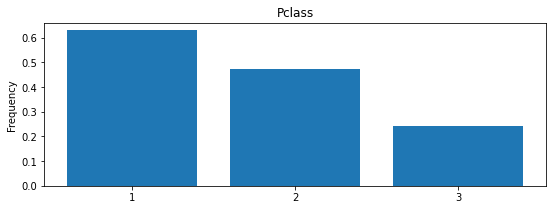

Pclass: 
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


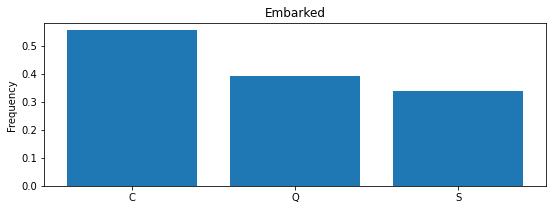

Embarked: 
 Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [11]:
category = ["Sex","SibSp","Parch",'Pclass','Embarked']
for col in category:
  bar_plot(col)

*رسم نمودار توزیع*

In [12]:
def plot_hist(column_name):
    plt.figure(figsize = (9,3))
    # plt.hist(?)
    num_bins = 100
    plt.hist(titanic_df['Age'], num_bins, density = True, histtype ='bar')
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.title(f"{column_name} distribution with hist")
    plt.show()

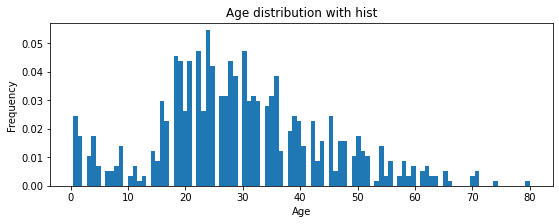

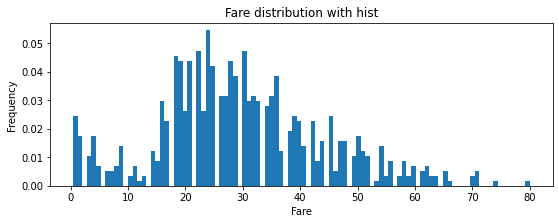

In [13]:
numerical = ["Age","Fare"]
for col in numerical:
  plot_hist(col)

*حذف داده های پرت*

In [4]:
def detect_outliers(titanic_df, columns):
  q1 = titanic_df[columns].quantile(0.25)
  q3 = titanic_df[columns].quantile(0.75)
  iqr = q3-q1
  fence_low  = q1-1.5*iqr
  fence_high = q3+1.5*iqr
  df_out = titanic_df.loc[(titanic_df[columns] > fence_low) & (titanic_df[columns] < fence_high)]
  return df_out

*پر کردن داده های خالی*

In [7]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('NaN')

*حذف ستون کابین*

In [ ]:
titanic_df.drop('Cabin', inplace=True, axis=1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


*آیا جنسیت میتواند اطلاعات مفیدی برای سن داشته باشد؟*

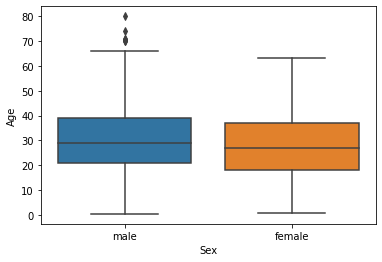

In [ ]:
sns.boxplot(x='Sex', y='Age', data= titanic_df)
plt.show()

خیر زیرا سن افراد به هم نزدیک است

*ترکیب جنسیت با پی کلس چطور؟*

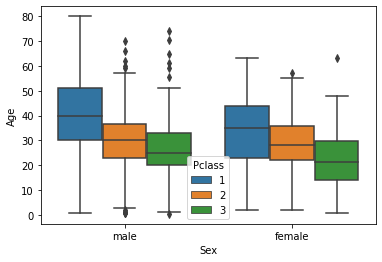

In [ ]:
sns.boxplot(x = "Sex", y = "Age", hue = "Pclass",data = titanic_df)
plt.show()

افراد با سن بیشتر دارای پی کلاس بیشتری هستند

*کدام داده ها دارای کورلیشن بیشتری با سن هستن؟*

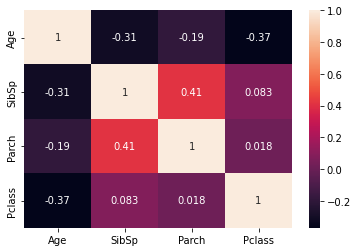

In [ ]:
sns.heatmap(titanic_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

Age/Pclass

*تحلیل نمودار زیر؟*

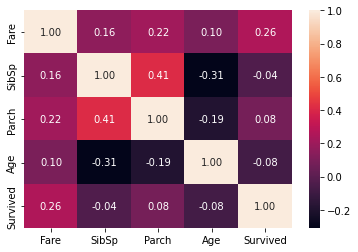

In [ ]:
corr_list = ["Fare", "SibSp", "Parch", "Age", "Survived"]
sns.heatmap(titanic_df[corr_list].corr(), annot = True, fmt = ".2f")
plt.show()

*تعویض ستون جنسیت با 0و1*

In [ ]:
titanic_df['new'] = titanic_df['Sex'].apply(lambda x: 1 if x== 'male' else 0)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
